In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import cm
from tqdm import tqdm
import json
import anndata as ad

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq

from scipy.stats import pearsonr
import scipy.sparse

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
adata = sc.read_h5ad("/data/projects/robin/segmentation/new-slide-glom-periglom-ps/adata_with_polygons.h5ad")

In [4]:
np.transpose(adata.obs)

,cell_CR9fbacb852-172697-0-0-0-0-0-0,cell_CR9fbacb852-183840-0-0-0-0-0-0,cell_CR9fbacb852-183965-0-0-0-0-0-0,cell_CR9fbacb852-184398-0-0-0-0-0-0,cell_CR9fbacb852-185040-0-0-0-0-0-0,cell_CR9fbacb852-185696-0-0-0-0-0-0,cell_CR9fbacb852-186095-0-0-0-0-0-0,cell_CR9fbacb852-186206-0-0-0-0-0-0,cell_CR9fbacb852-186210-0-0-0-0-0-0,cell_CR9fbacb852-186224-0-0-0-0-0-0,...,cell_CR9fbacb852-343249-1,cell_CR9fbacb852-343278-1,cell_CR9fbacb852-344028-1,cell_CR9fbacb852-344130-1,cell_CR9fbacb852-344134-1,cell_CR9fbacb852-344135-1,cell_CR9fbacb852-344237-1,cell_CR9fbacb852-344280-1,cell_CR9fbacb852-344416-1,cell_CR9fbacb852-344461-1
x,5686.6303,5533.8674,5544.45795,7113.6892,7705.488675,6986.653124,6463.491157,8002.161047,8007.019641,8023.5149,...,7437.606486,6851.479345,6420.307371,7150.82447,7426.221879,7156.741758,7246.01135,7478.337415,7380.969613,7486.83427
y,16243.58775,17797.181667,17818.82175,16393.4931,16117.277875,17118.356714,17788.782833,16312.23236,16303.049265,16295.253826,...,2441.129181,3803.623745,2801.506047,1962.046295,2851.256139,2170.739595,3333.079183,2462.420563,2642.821607,1951.55596
z,32.710325,28.890549,27.17857,23.298814,23.637515,22.435533,23.064745,23.118077,25.07757,25.265377,...,37.654304,42.429841,39.312054,38.971567,37.564034,38.006215,34.770267,34.261774,38.622404,38.974609
cluster,4,3,3,4,4,4,4,1,1,1,...,4,4,1,4,4,1,4,4,4,4
n_transcripts,8,6,8,10,12,21,42,43,17,43,...,21,11,17,20,28,19,18,41,15,10
density,0.3695,0.8171,2.223,1.327,1.779,1.186,2.113,0.9434,0.4091,1.394,...,1.73,8.302,2.049,1.561,0.5159,0.9734,1.05,1.689,2.091,6.234
elongation,3.021,4.3,2.835,1.694,1.445,1.628,1.335,2.438,1.513,1.978,...,2.101,1.81,3.232,6.635,2.73,2.325,25.29,9.127,4.592,15.3
area,21.65,7.343,3.599,7.536,6.745,17.7,19.88,45.58,41.55,30.84,...,12.14,1.325,8.296,12.81,54.27,19.52,17.14,24.27,7.173,1.604
avg_confidence,0.9724,0.9859,0.9743,0.9939,0.9983,0.9946,0.9978,0.9898,0.9381,0.9948,...,0.998,0.9971,0.9983,0.9978,0.9952,0.9967,0.9914,0.9982,0.9983,0.998
avg_assignment_confidence,0.9025,0.97,0.9775,0.978,0.995,0.9933,0.9971,0.9619,0.9047,0.9921,...,0.7352,0.8764,0.7882,0.787,0.6,0.7937,0.6889,0.7439,0.7467,0.87


In [5]:
adata = adata[adata.obs['is_in_polygon']] 
adata = adata[adata.obs['celltype_l1'] == "PEC"]

In [6]:
disease_set = adata.obs['Disease'].unique()
disease_set

['Cntrl', 'ANCA', 'GBM', 'SLE']
Categories (4, object): ['Cntrl', 'SLE', 'ANCA', 'GBM']

In [7]:
disease_order = ['Cntrl', 'ANCA', 'GBM', 'SLE']
df = adata.obs
df['label'] = pd.Categorical(df['Disease'], categories=disease_order, ordered=True)

In [8]:
df


,x,y,z,cluster,n_transcripts,density,elongation,area,avg_confidence,avg_assignment_confidence,...,nichepca_domain,nichepca_domain_tuned,nichepca_glom_no,CD44_prot,Ki67_prot,glom_ID,polygon_flags,is_in_polygon,is_in_glom,is_in_periglom
cell_CR9fbacb852-186604-0-0-0-0-0-0,8144.040834,16277.815017,23.841296,4,29,1.7640,2.387,16.44,0.9971,0.9593,...,Other,Other,Other,0,0,Other_0011186_Cntrl_X1_slide2,0_0011186_Cntrl_X1_slide2,True,False,True
cell_CR9fbacb852-186605-0-0-0-0-0-0,8159.262823,16261.916967,25.886595,1,30,0.8641,28.630,34.72,0.9896,0.9687,...,Other,Other,Other,0,0,Other_0011186_Cntrl_X1_slide2,0_0011186_Cntrl_X1_slide2,True,False,True
cell_CR9fbacb852-186677-0-0-0-0-0-0,8144.195701,16290.583178,24.225777,4,101,2.9070,9.807,34.74,0.9978,0.9566,...,Other,Other,Other,0,0,Other_0011186_Cntrl_X1_slide2,0_0011186_Cntrl_X1_slide2,True,False,True
cell_CR9fbacb852-186731-0-0-0-0-0-0,8192.604171,16250.107725,27.897920,1,80,2.2730,4.720,35.19,0.9978,0.9948,...,Other,Other,Other,0,0,Other_0011186_Cntrl_X1_slide2,0_0011186_Cntrl_X1_slide2,True,False,True
cell_CR9fbacb852-186767-0-0-0-0-0-0,8144.819986,16305.816510,25.977430,4,105,1.3460,3.974,77.98,0.9967,0.9598,...,Other,Other,Other,0,0,Other_0011186_Cntrl_X1_slide2,0_0011186_Cntrl_X1_slide2,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_CR9fbacb852-331964-1,6298.832975,2771.171592,39.646133,4,12,3.3430,1.517,3.59,0.9983,0.8467,...,Glom.,Glom.,2,0,0,2_0011186_SLE_X7_slide2,2_0011186_SLE_X7_slide2,True,True,False
cell_CR9fbacb852-331982-1,7177.630189,2292.395295,38.123750,4,19,1.4130,4.763,13.45,0.9974,0.7779,...,Glom.,Glom.,3,0,0,3_0011186_SLE_X7_slide2,3_0011186_SLE_X7_slide2,True,True,False
cell_CR9fbacb852-333911-1,6205.432373,1881.687145,37.128955,1,11,0.6159,1.746,17.86,0.9775,0.8491,...,Other,Other,Other,0,0,Other_0011186_SLE_X7_slide2,"0_0011186_SLE_X7_slide2,1_0011186_SLE_X7_slide2",True,False,True
cell_CR9fbacb852-335223-1,7445.480690,2412.013745,35.699197,4,20,1.1610,7.309,17.22,0.9853,0.8610,...,Other,Other,Other,0,0,Other_0011186_SLE_X7_slide2,4_0011186_SLE_X7_slide2,True,False,True


In [9]:
df[['Disease' , 'Ki67_prot']].groupby('Disease').agg('max')

,Ki67_prot
Disease,
Cntrl,640
SLE,12
ANCA,101
GBM,2


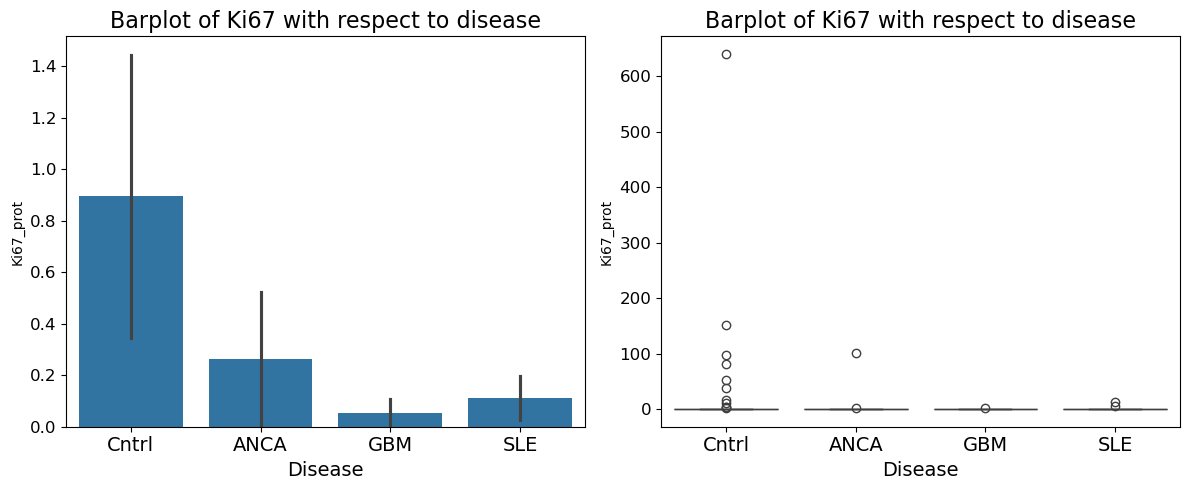

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


ch = 'Ki67_prot'
label  = 'Disease'
sns.barplot(x=label, y=ch, data=df, ax=axes[0], errorbar='se', order=disease_order)
axes[0].set_title('Barplot of Ki67 with respect to disease', fontsize=16)
axes[0].set_xlabel('Disease', fontsize=14)
# axes[0].set_ylabel('x', fontsize=14)
axes[0].tick_params(axis='x', labelsize=14)
axes[0].tick_params(axis='y', labelsize=12)

sns.boxplot(x=label, y=ch, data=df, ax=axes[1], order=disease_order)
axes[1].set_title('Barplot of Ki67 with respect to disease', fontsize=16)
axes[1].set_xlabel('Disease', fontsize=14)
# axes[1].set_ylabel('x', fontsize=14)
axes[1].tick_params(axis='x', labelsize=14)
axes[1].tick_params(axis='y', labelsize=12)


plt.tight_layout()
plt.show()

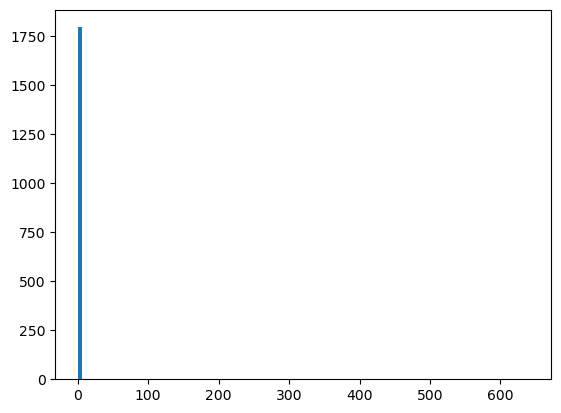

In [11]:
plt.hist(df[ch], 100);


(0.0, 100.0)

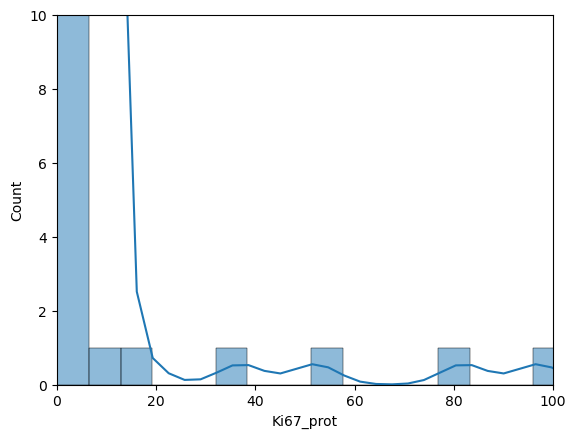

In [12]:
sns.histplot(df.loc[df['Disease'] == disease_order[0], ch], bins= 100,kde = True)
plt.ylim([0, 10])
plt.xlim([0, 100])

(0.0, 100.0)

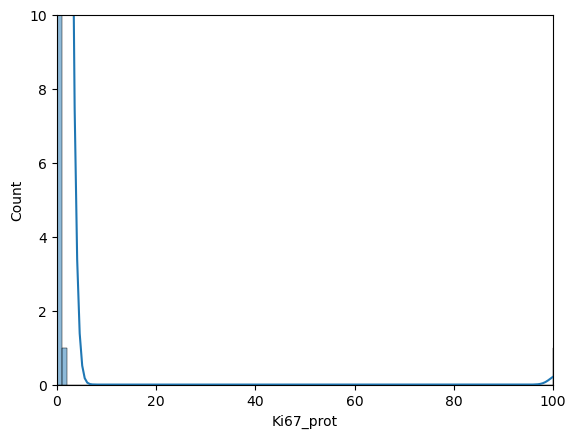

In [13]:
sns.histplot(df.loc[df['Disease'] == disease_order[1], ch], bins= 100,kde = True)
plt.ylim([0, 10])
plt.xlim([0, 100])

<Axes: xlabel='Ki67_prot', ylabel='Count'>

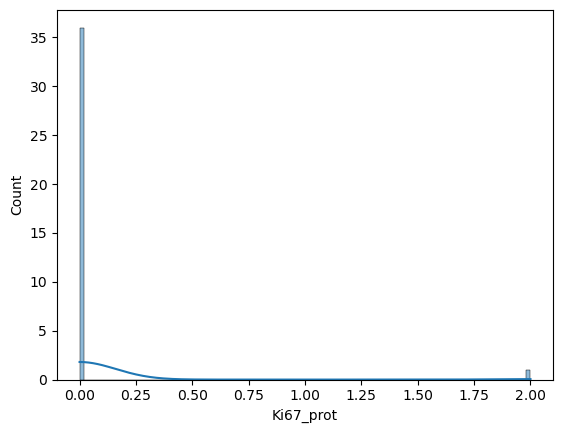

In [14]:
sns.histplot(df.loc[df['Disease'] == disease_order[2], ch], bins= 100,kde = True)

<Axes: xlabel='Ki67_prot', ylabel='Count'>

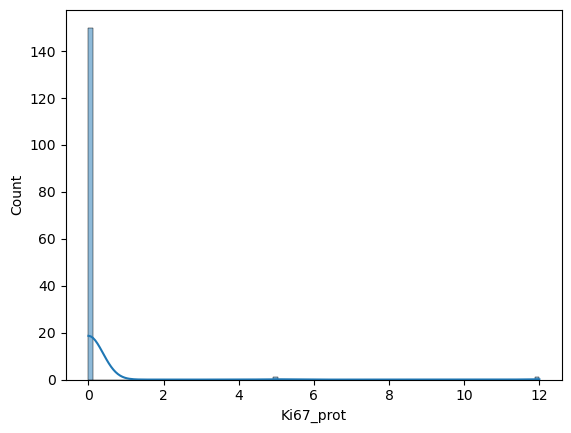

In [15]:
sns.histplot(df.loc[df['Disease'] == disease_order[3], ch], bins= 100,kde = True)

In [16]:
df.loc[df['Disease'] == disease_order[3], ch]

cell_CR9fbacb852-15735-1     0
cell_CR9fbacb852-15804-1     0
cell_CR9fbacb852-15810-1     0
cell_CR9fbacb852-15825-1     0
cell_CR9fbacb852-15875-1     0
                            ..
cell_CR9fbacb852-331964-1    0
cell_CR9fbacb852-331982-1    0
cell_CR9fbacb852-333911-1    0
cell_CR9fbacb852-335223-1    0
cell_CR9fbacb852-338169-1    0
Name: Ki67_prot, Length: 152, dtype: int64

In [17]:
df = df.reset_index(drop=True)
df

,x,y,z,cluster,n_transcripts,density,elongation,area,avg_confidence,avg_assignment_confidence,...,nichepca_domain,nichepca_domain_tuned,nichepca_glom_no,CD44_prot,Ki67_prot,glom_ID,polygon_flags,is_in_polygon,is_in_glom,is_in_periglom
0,8144.040834,16277.815017,23.841296,4,29,1.7640,2.387,16.44,0.9971,0.9593,...,Other,Other,Other,0,0,Other_0011186_Cntrl_X1_slide2,0_0011186_Cntrl_X1_slide2,True,False,True
1,8159.262823,16261.916967,25.886595,1,30,0.8641,28.630,34.72,0.9896,0.9687,...,Other,Other,Other,0,0,Other_0011186_Cntrl_X1_slide2,0_0011186_Cntrl_X1_slide2,True,False,True
2,8144.195701,16290.583178,24.225777,4,101,2.9070,9.807,34.74,0.9978,0.9566,...,Other,Other,Other,0,0,Other_0011186_Cntrl_X1_slide2,0_0011186_Cntrl_X1_slide2,True,False,True
3,8192.604171,16250.107725,27.897920,1,80,2.2730,4.720,35.19,0.9978,0.9948,...,Other,Other,Other,0,0,Other_0011186_Cntrl_X1_slide2,0_0011186_Cntrl_X1_slide2,True,False,True
4,8144.819986,16305.816510,25.977430,4,105,1.3460,3.974,77.98,0.9967,0.9598,...,Other,Other,Other,0,0,Other_0011186_Cntrl_X1_slide2,0_0011186_Cntrl_X1_slide2,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798,6298.832975,2771.171592,39.646133,4,12,3.3430,1.517,3.59,0.9983,0.8467,...,Glom.,Glom.,2,0,0,2_0011186_SLE_X7_slide2,2_0011186_SLE_X7_slide2,True,True,False
1799,7177.630189,2292.395295,38.123750,4,19,1.4130,4.763,13.45,0.9974,0.7779,...,Glom.,Glom.,3,0,0,3_0011186_SLE_X7_slide2,3_0011186_SLE_X7_slide2,True,True,False
1800,6205.432373,1881.687145,37.128955,1,11,0.6159,1.746,17.86,0.9775,0.8491,...,Other,Other,Other,0,0,Other_0011186_SLE_X7_slide2,"0_0011186_SLE_X7_slide2,1_0011186_SLE_X7_slide2",True,False,True
1801,7445.480690,2412.013745,35.699197,4,20,1.1610,7.309,17.22,0.9853,0.8610,...,Other,Other,Other,0,0,Other_0011186_SLE_X7_slide2,4_0011186_SLE_X7_slide2,True,False,True


In [18]:
df = df.reset_index(drop=True)
# df.insert(1, 'Ki67_prc', 0)
th = 1
df.loc[:, 'Ki67_prc'] = [1.0 if i>th else 0.0 for i in df['Ki67_prot']]
df['Ki67_prc'].sum()

16.0

In [20]:
# # fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ch = 'Ki67_prc'
# percent = df.groupby('label')[ch].mean() * 100
# percent = percent.reindex(disease_order)
# percent.plot(kind='bar', figsize=(8, 6))

# plt.title(f'Percentage of Ki67 > {th}')
# plt.xlabel('Disease')
# plt.ylabel('Percentage')
# plt.show()

(0.0, 1000.0)

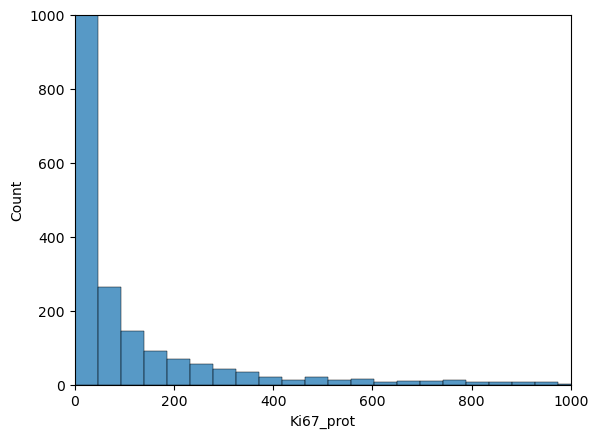

In [18]:
sns.histplot(adata.obs['Ki67_prot'], bins= 100)
plt.ylim([0, 1000])
plt.xlim([0, 1000])

In [31]:
for sample in adata.obs["sample"].unique():
    if sample != 'X7_slide2':
        continue
        
    adata_i = adata[adata.obs['sample'] == sample]
    condition = adata_i.obs.Disease.unique()[0]
    ll = []
    for _,row in adata_i.obs.iterrows():
        l = 'other'
        if row['is_in_polygon']:
            if row['celltype_l1'] == 'PEC':
                if row['Ki67_prot'] > 0:
                    l = 'PEC_with_Ki67_in_glom'
                else:
                    l = 'PEC_without_Ki67_in_glom'
        ll.append(l)
    adata_i.obs['in_polygon'] = ll
    
    adata_i.obs['in_polygon'] = adata_i.obs['in_polygon'].astype('category')

    
    colormap = {'PEC_with_Ki67_in_glom':'red', 
                'PEC_without_Ki67_in_glom' : 'blue', 
                'other': 'lightgray'}
    adata_i.obs['in_polygon'] = pd.Categorical(adata_i.obs['in_polygon'], 
                                       categories=list(colormap.keys()), 
                                       ordered=True)
    adata_i.uns['in_polygon_colors'] = list(colormap.values())
    
    adata_i.obs['size'] = [10 if i == 'PEC_with_Ki67_in_glom' else 10 for i in adata_i.obs['in_polygon']]
    
    n = (adata_i.obs['in_polygon'] == 'PEC_with_Ki67_in_glom').sum()

    # adata_i.obs['Ki67_thr'] = adata_i.obs['CD44_prot'] > 100
    fig, ax = plt.subplots(figsize=(20, 20))
    sc.pl.spatial(adata_i, 
                color = 'in_polygon',
                title=f"{sample}_{condition}_N={n}.",
                spot_size = adata_i.obs['size'],
                ax=ax,
                show=False)
    
    # plt.gca().invert_yaxis()
    plt.savefig(f"fig_slide2/sample_{sample}_.pdf")
    plt.close()
    print(condition)
    print("--")


SLE
--


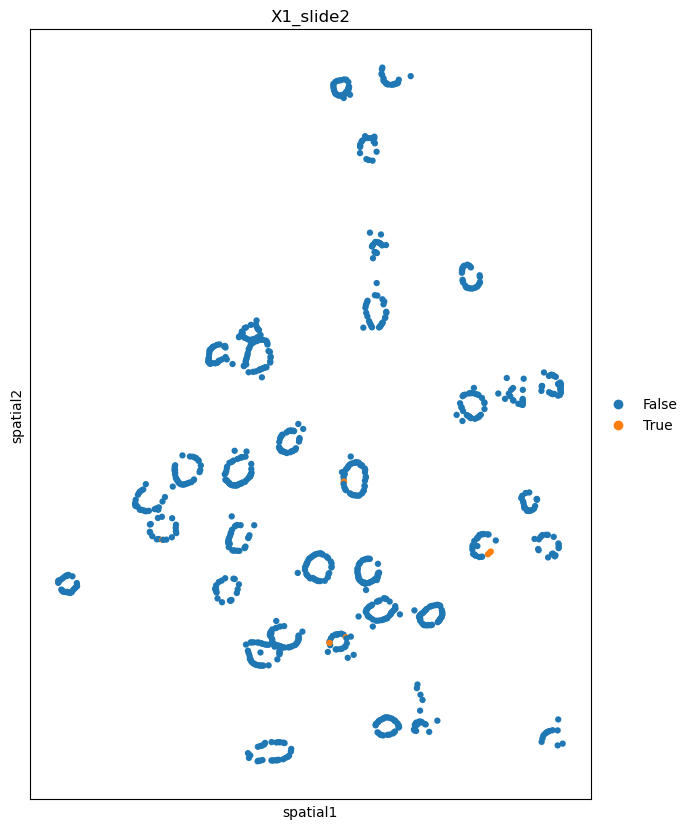

11
Cntrl
--


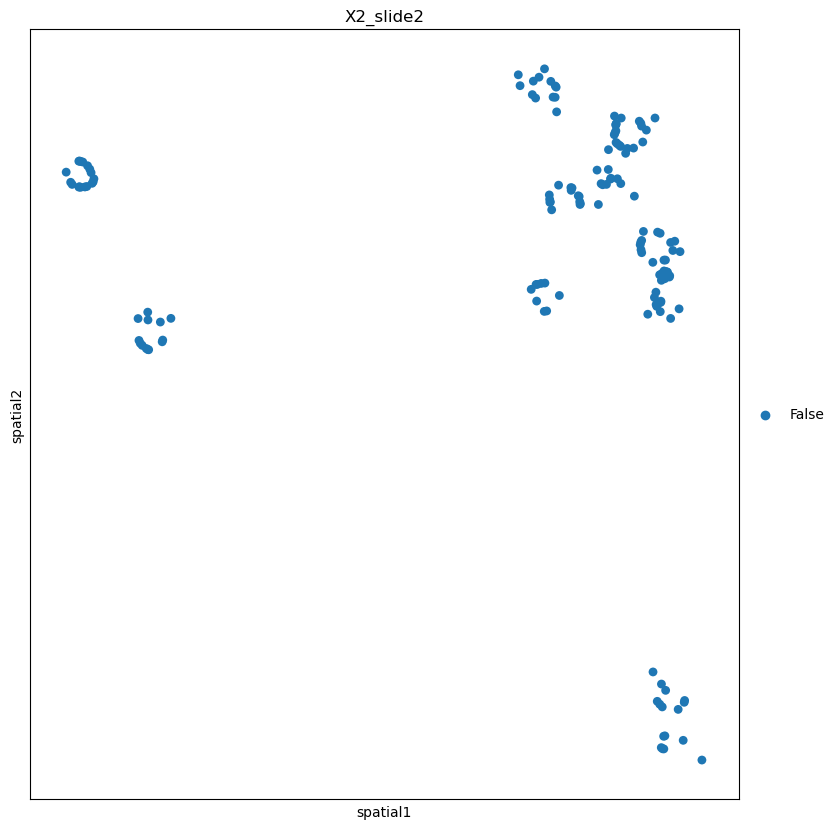

0
Cntrl
--


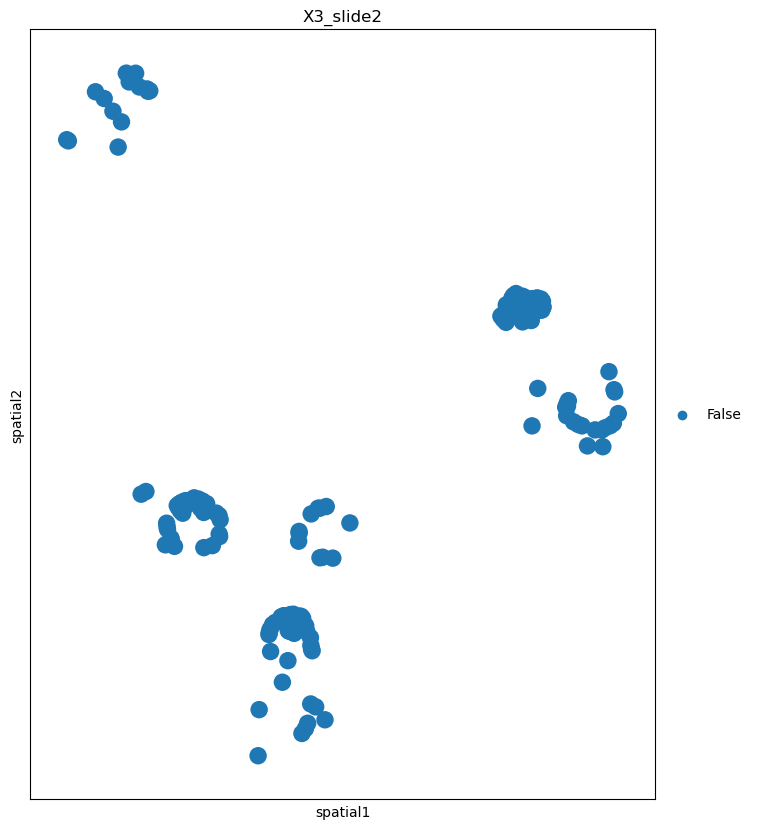

0
ANCA
--


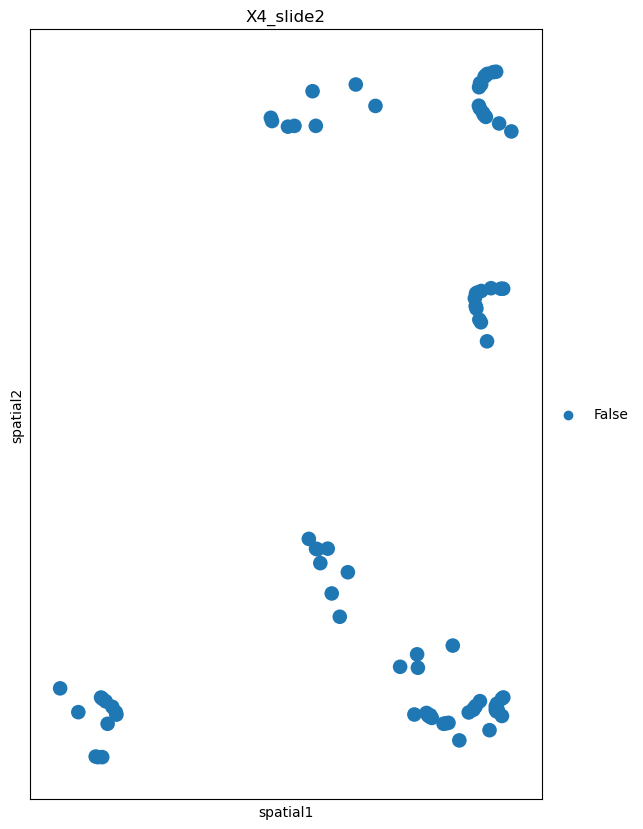

0
ANCA
--


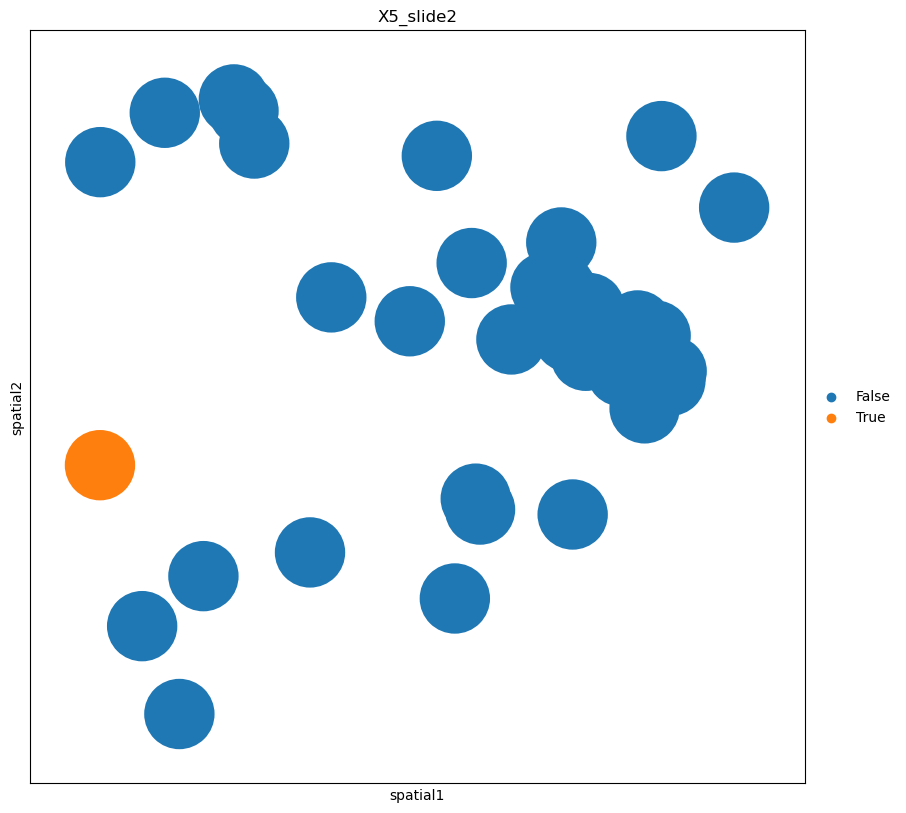

1
GBM
--


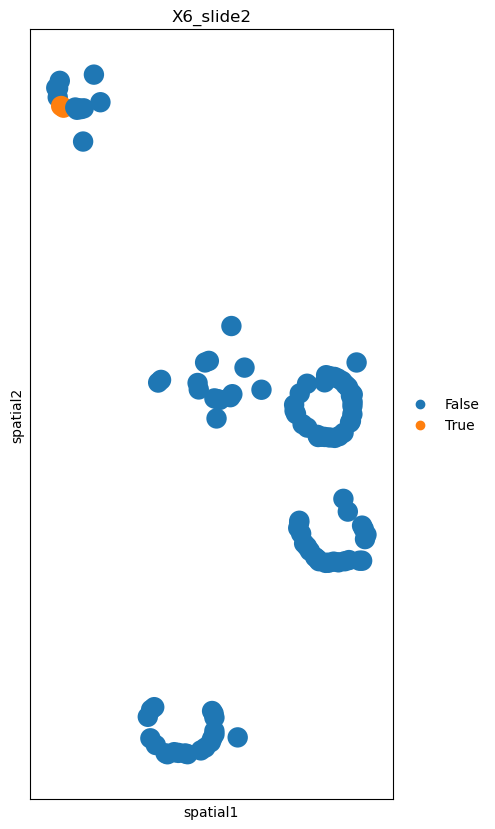

2
ANCA
--


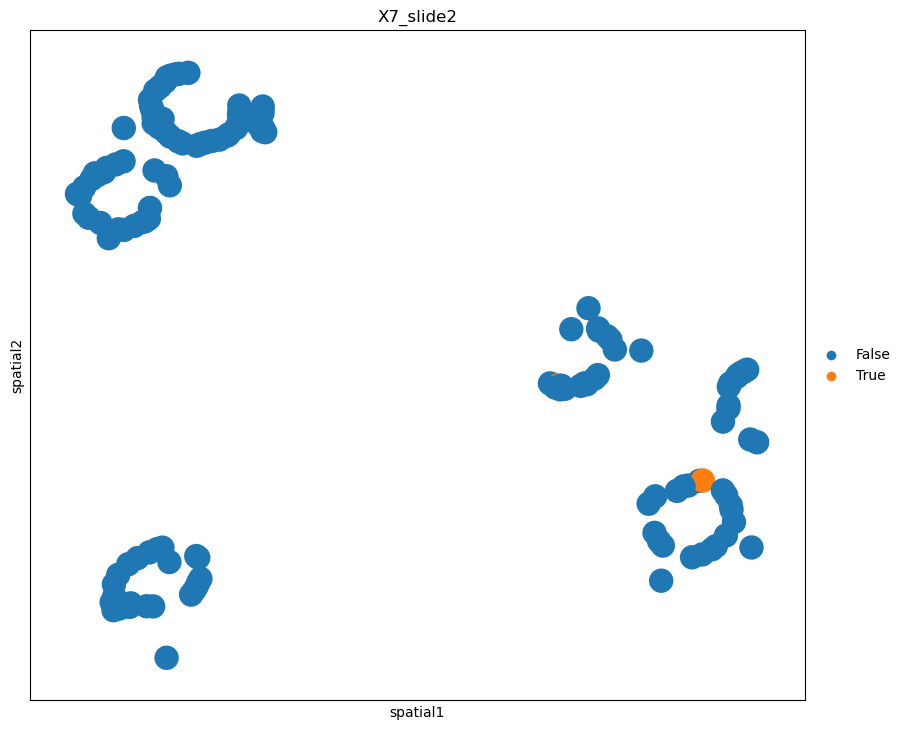

2
SLE
--


In [26]:
for sample in adata.obs["sample"].unique():
    adata_i = adata[adata.obs['sample'] == sample]
    condition = adata_i.obs.Disease.unique()[0]
    # adata_i = adata_i[adata_i.obs['celltype_l1'] == 'PEC']
    adata_i = adata_i[adata_i.obs['is_in_polygon']]
    adata_i.obs['Ki67_bin'] = adata_i.obs['Ki67_prot'] > 0
    
    fig, ax = plt.subplots(figsize=(10, 10))
    
    sc.pl.spatial(adata_i, 
                color = 'Ki67_bin',
                  title=sample,
                 spot_size = 50,
                 ax = ax)
    print(adata_i.obs['Ki67_bin'].sum())
    print(condition)
    print("--")

SLE


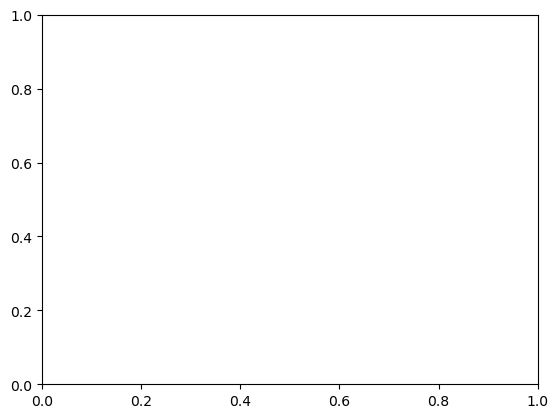

In [14]:
ax = plt.subplot(111)
sc.pl.spatial(adata_i, 
            color = 'in_polygon',
            title=f"{sample}_{condition}_N={n}.",
            spot_size = adata_i.obs['size'],
            show=False)

plt.gca().invert_yaxis()
plt.savefig(f"fig/sample_{sample}.pdf")
plt.close()
print(condition)

In [58]:
for sample in adata.obs["sample"].unique():
    adata_i = adata[adata.obs['sample'] == sample]
    condition = adata_i.obs.Disease.unique()[0]
    a = adata_i.obs['nichepca_glom_no'].unique()
    n_glom = np.max([int(i) for i in a[a != 'Other']])
    print(condition)
    print(n_glom)
    

Cntrl
35
Cntrl
10
ANCA
6
ANCA
6
GBM
0
ANCA
4
SLE
5


In [68]:
100 / (35 + 10)

2.2222222222222223

In [69]:
200 / 5

40.0

In [70]:
200 / (6 + 6 + 4)

12.5

In [71]:
100 / 1

100.0

In [6]:
adata_i = adata[adata.obs['sample'] == 'X7_slide2']

ValueError: When .uns['spatial'][library_id] does not exist, spot_size must be provided directly.

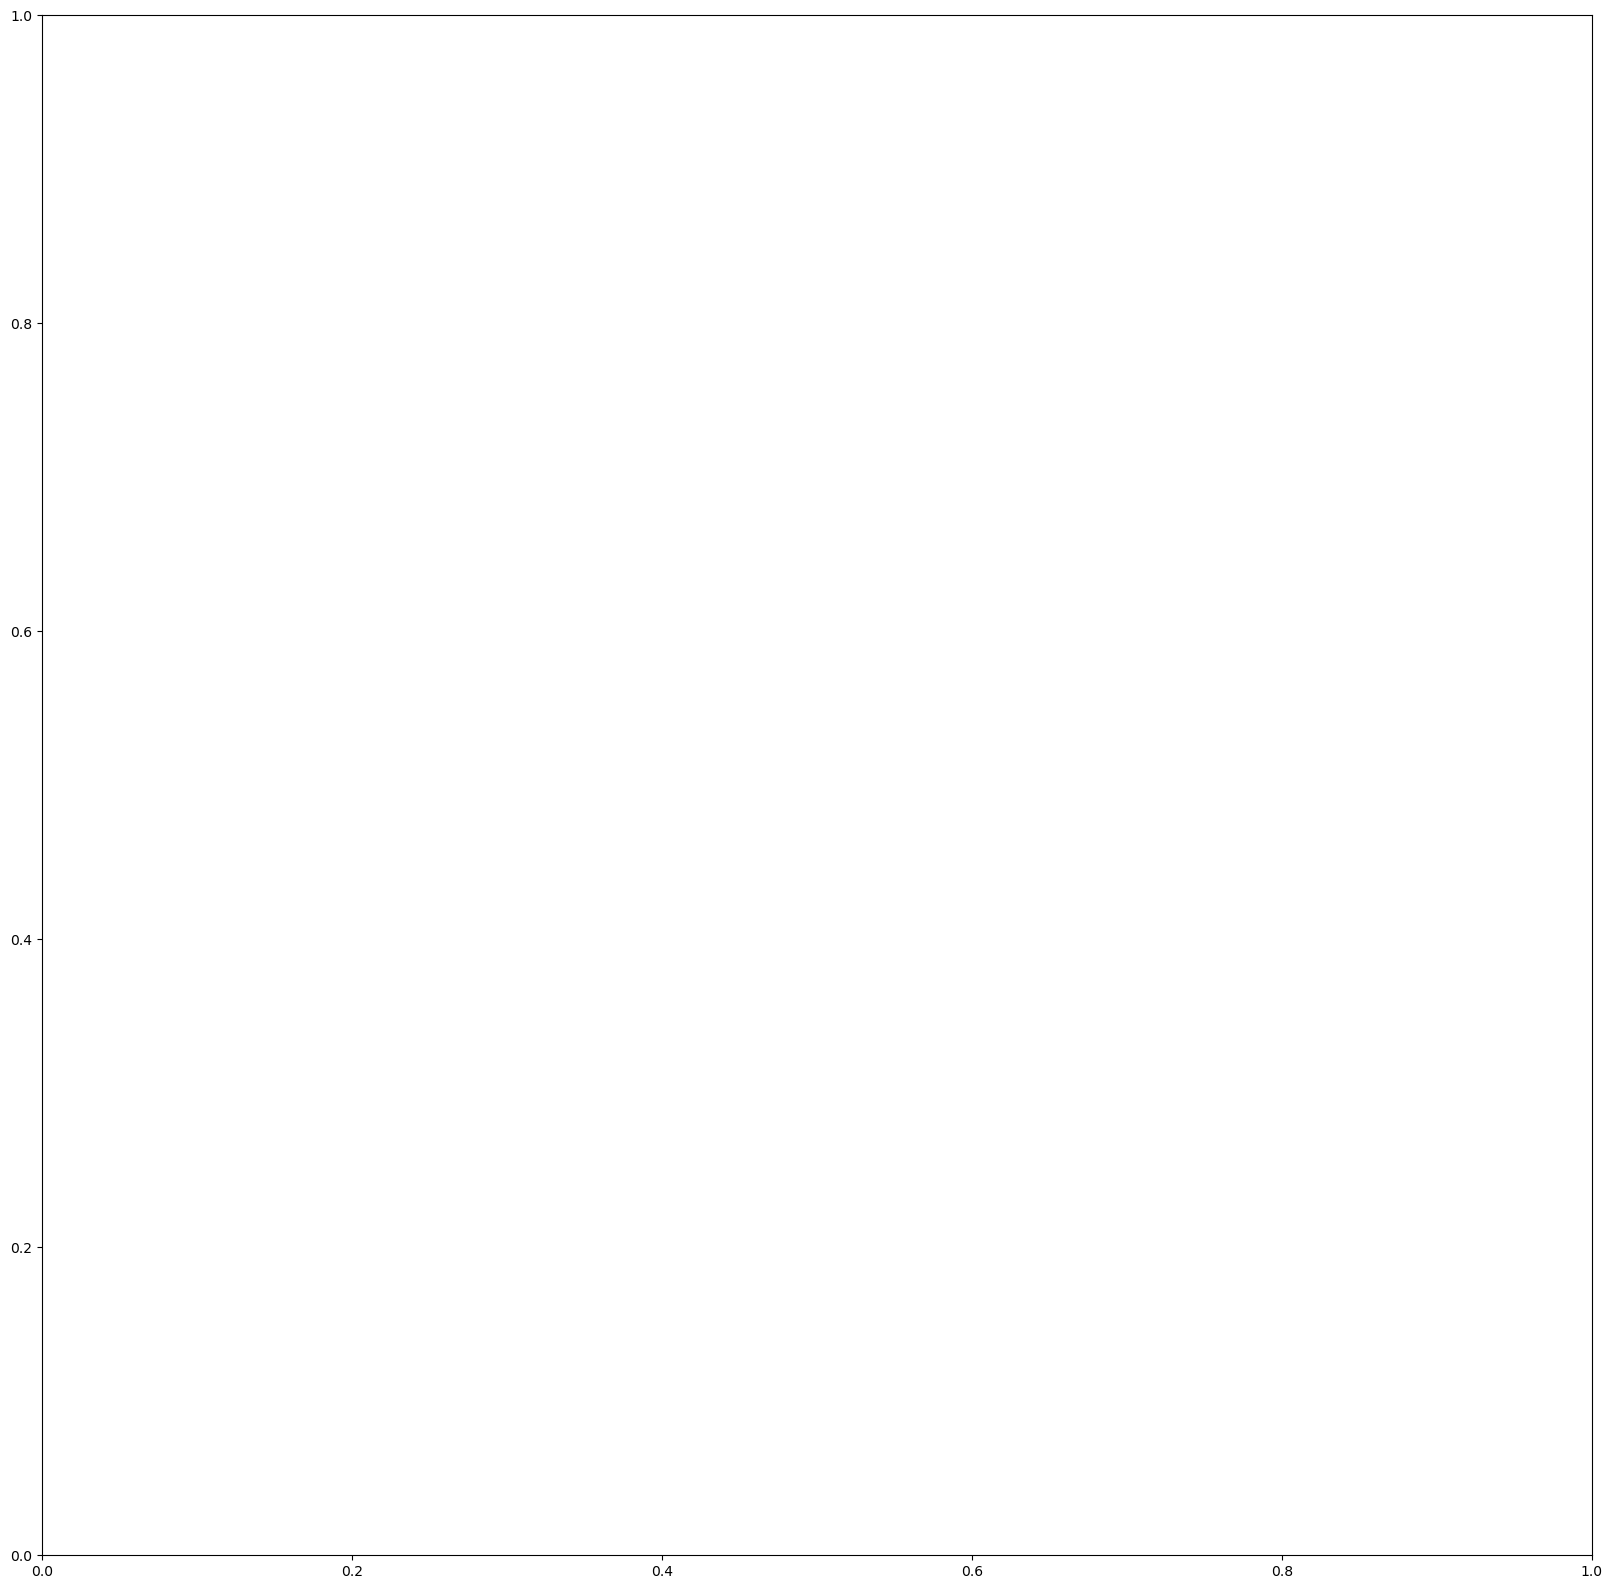

In [15]:
fig, ax = plt.subplots(figsize=(20, 20))
sc.pl.spatial(adata_i, 
            color = 'Ki67_prot',
            # title=f"{sample}_{condition}_N={n}.",
            # spot_size = adata_i.obs['size'],
            # ax=ax
             )

In [7]:
adata_i

,x,y,z,cluster,n_transcripts,density,elongation,area,avg_confidence,avg_assignment_confidence,...,nichepca_domain,nichepca_domain_tuned,nichepca_glom_no,CD44_prot,Ki67_prot,glom_ID,polygon_flags,is_in_polygon,is_in_glom,is_in_periglom
cell_CR9fbacb852-12121-1,6032.449684,1076.280280,35.645237,2,49,0.9256,2.004,52.940,0.9975,0.9971,...,Other,Other,Other,0,0,Other_0011186_SLE_X7_slide2,,False,False,False
cell_CR9fbacb852-13226-1,5911.500627,1687.337272,37.135910,4,139,2.5070,1.961,55.450,0.9978,0.9807,...,Other,Other,Other,2,0,Other_0011186_SLE_X7_slide2,,False,False,False
cell_CR9fbacb852-13244-1,5918.133763,1680.444723,36.907107,1,115,1.2010,1.947,95.740,0.9975,0.9617,...,Other,Other,Other,0,0,Other_0011186_SLE_X7_slide2,,False,False,False
cell_CR9fbacb852-13263-1,5905.313392,1696.729325,36.513685,1,65,1.9960,2.155,32.560,0.9977,0.8465,...,Other,Other,Other,0,0,Other_0011186_SLE_X7_slide2,,False,False,False
cell_CR9fbacb852-13268-1,5908.233114,1700.804231,38.731637,1,219,3.2690,1.370,67.000,0.9976,0.9141,...,Other,Other,Other,2,0,Other_0011186_SLE_X7_slide2,,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_CR9fbacb852-344135-1,7156.741758,2170.739595,38.006215,1,19,0.9734,2.325,19.520,0.9967,0.7937,...,Other,Other,Other,1,0,Other_0011186_SLE_X7_slide2,,False,False,False
cell_CR9fbacb852-344237-1,7246.011350,3333.079183,34.770267,4,18,1.0500,25.290,17.140,0.9914,0.6889,...,Other,Other,Other,0,0,Other_0011186_SLE_X7_slide2,,False,False,False
cell_CR9fbacb852-344280-1,7478.337415,2462.420563,34.261774,4,41,1.6890,9.127,24.270,0.9982,0.7439,...,Glom.,Glom.,4,7,0,4_0011186_SLE_X7_slide2,4_0011186_SLE_X7_slide2,True,True,False
cell_CR9fbacb852-344416-1,7380.969613,2642.821607,38.622404,4,15,2.0910,4.592,7.173,0.9983,0.7467,...,Glom.,Glom.,5,1,0,5_0011186_SLE_X7_slide2,5_0011186_SLE_X7_slide2,True,True,False


In [5]:
adata.obs['sample']

cell_CR9fbacb852-172697-0-0-0-0-0-0    X1_slide2
cell_CR9fbacb852-183840-0-0-0-0-0-0    X1_slide2
cell_CR9fbacb852-183965-0-0-0-0-0-0    X1_slide2
cell_CR9fbacb852-184398-0-0-0-0-0-0    X1_slide2
cell_CR9fbacb852-185040-0-0-0-0-0-0    X1_slide2
                                         ...    
cell_CR9fbacb852-344135-1              X7_slide2
cell_CR9fbacb852-344237-1              X7_slide2
cell_CR9fbacb852-344280-1              X7_slide2
cell_CR9fbacb852-344416-1              X7_slide2
cell_CR9fbacb852-344461-1              X7_slide2
Name: sample, Length: 289602, dtype: category
Categories (7, object): ['X1_slide2', 'X2_slide2', 'X3_slide2', 'X4_slide2', 'X5_slide2', 'X6_slide2', 'X7_slide2']